# Final Evaluation

In [1]:
import warnings
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib
import os
import sys

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "src")))
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

## Load Test Data Processed

In [2]:
print("Load test data")
%time test_df = pd.read_csv('../data/processed/test_data.csv')
print(
    "{0} test data loaded, containing {1} fraudulent transactions".format(
        len(test_df), test_df["is_fraud"].sum()
    )
)

Load test data
CPU times: user 8.82 s, sys: 1.3 s, total: 10.1 s
Wall time: 10.5 s
555719 test data loaded, containing 2145 fraudulent transactions


## Load Model

In [3]:
import pickle

# load model that you would like to evaluate
with open("../saved_model/classifier/xgboost_scale_pos_weight50.pkl", "rb") as file:
    clf = pickle.load(file)

## Make Predictions

In [4]:
drop_col = [
    "Unnamed: 0",
    "trans_date_trans_time",
    "cc_num",
    "merchant",
    "category",
    "first",
    "last",
    "street",
    "city",
    "state",
    "zip",
    "job",
    "dob",
    "unix_time",
    "job_category",
    "trans_date",
    "trans_num",
    "is_fraud",
]
input_features = [col for col in test_df.columns if col not in drop_col]
target_feature = ["is_fraud"]

In [5]:
predictions_test = clf.predict_proba(test_df[input_features])[:, 1]

In [6]:
test_df["predictions"] = (
    predictions_test > 0.5
).round()  # threshold = 0.25 for stricter non-fradulent activaities

## Evaluation

In [7]:
from models.tree_based import performance_assessment

performance_assessment(test_df)

,auc_roc,average precision,f1 score,precision_top_50
0,0.955,0.771,0.877,0.202


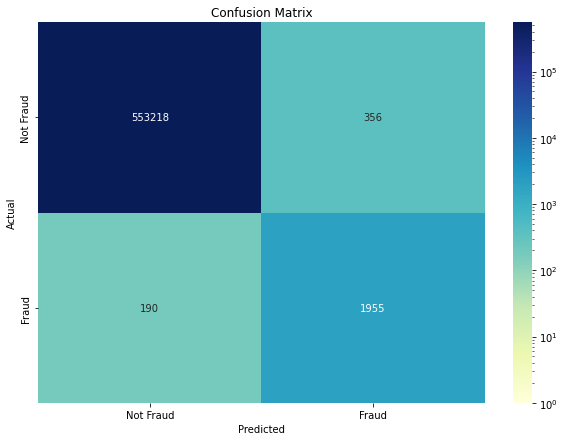

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Compute confusion matrix
cm = confusion_matrix(test_df["is_fraud"], test_df["predictions"])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=["Not Fraud", "Fraud"],
    yticklabels=["Not Fraud", "Fraud"],
    norm=LogNorm(vmin=1, vmax=cm.max()),
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
reimbursement_loss = test_df[
    (test_df["predictions"] == 0) & (test_df["is_fraud"] == 1)
]["amt"].sum()
reimbursement_loss

41311.61000000001

## Outlook

If given more time, we could:

- add scripts to process evaluation more efficient
- ...